# Sequence Generator with Specific Secondary Structure

## The Problem

I have a library of peptides, I still have room for 100 variants and I want to screen a specific peptide. I know that this peptide should be helical, and it should contain these amino acids in that specific positions.  xPxxPxxRQ . There are 20 amino acids, that means that there are around 3M different combinations. So, why not try to enrich my 100 free slots with variants with higher changes to fold into a helix. 

The relative position in the space of critical amino acids is vital for the Protein-Peptide interactions consequently is important to generate libraries of peptides that trend to adopt a secondary structure compatible with our target. 

## Challenges

The adoption of a secondary structure depends on both local and long-range factors, some of them are not completely understood. Actually, the best predictor to this date has an 81% of accuracy and use a combination of evolutive and neural networks pipeline. 
Because the adoption of an amino acid j in an ith position depends not only of local but also of long-range factor downstream of the sequence, we can try to train a generator of sequence s using LSTM. 

In [1]:
from IPython.display  import Image

In [2]:
Image(url='https://ka-perseus-images.s3.amazonaws.com/cd59edaf690af9b30fad410a48d4a8003f3cda53.png')

# Training Dataset

We can extract the SS from the Protein Data Bank, a repository of 3D structures. For this exercise, I will focus only on Q3 (helix, strand, and coil) structures and will use only segments with homogenous secondary structure.

https://www.rcsb.org/pdb/static.do?p=download/http/index.html

## Preprocess Data, One-hot encoding



# The Model

In [4]:
Image(url='https://i.imgur.com/jzVrf7f.png')

In [5]:
Image(url='https://i.imgur.com/JH58tXY.png')

In [ ]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
 


In order to speed this demo up, let's load a pre-train model. I trained the model on  10 amino acids sliding window of homogenous secondary structure, allowing  3 positions of overlap among segments. 



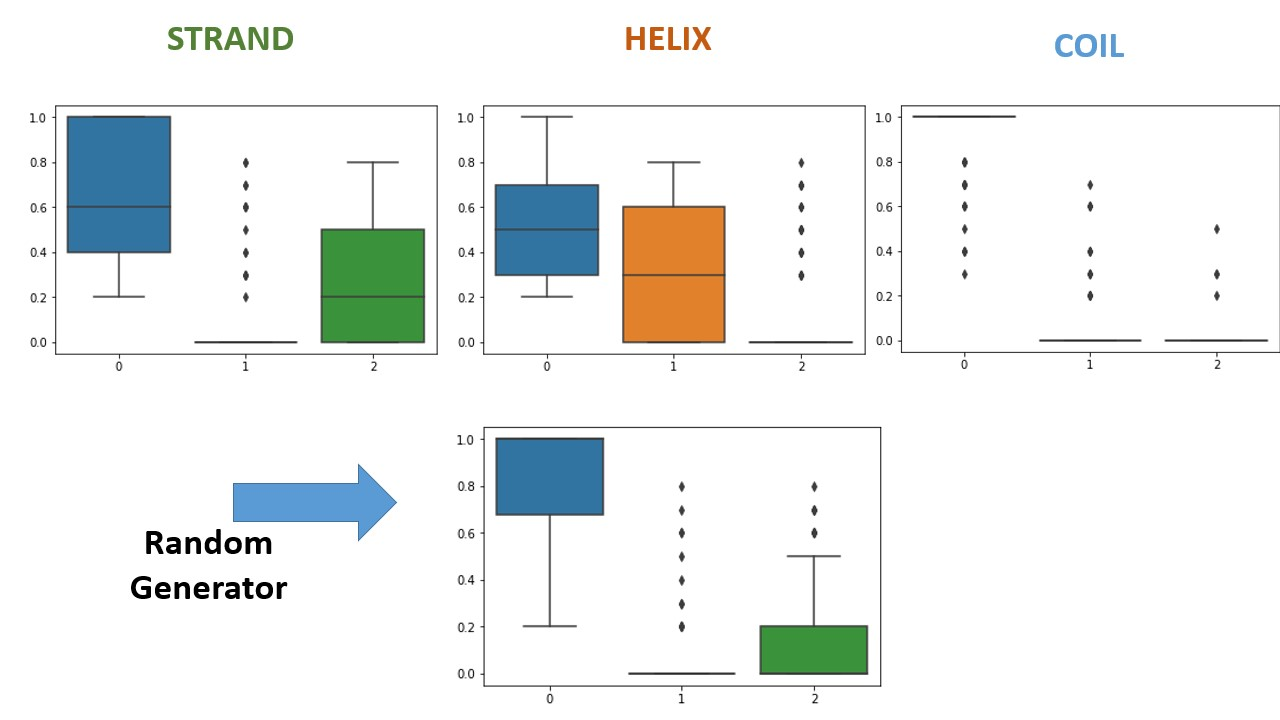

In [3]:
Image(filename='./Test_psipred.jpg')

Random Sampling : The nice thing about random search is that the results are very diverse, however, often the results are too diverse, they look too random. To fix this randomness, we increase the probability of the most probable words, and decrease the probabilities of less probable ones using temperature. The higher the temperature, the more diverse results it gives and vice versa.


Decreasing the temperature from 1 to some lower number (e.g. 0.5) makes the RNN more confident, but also more conservative in its samples.

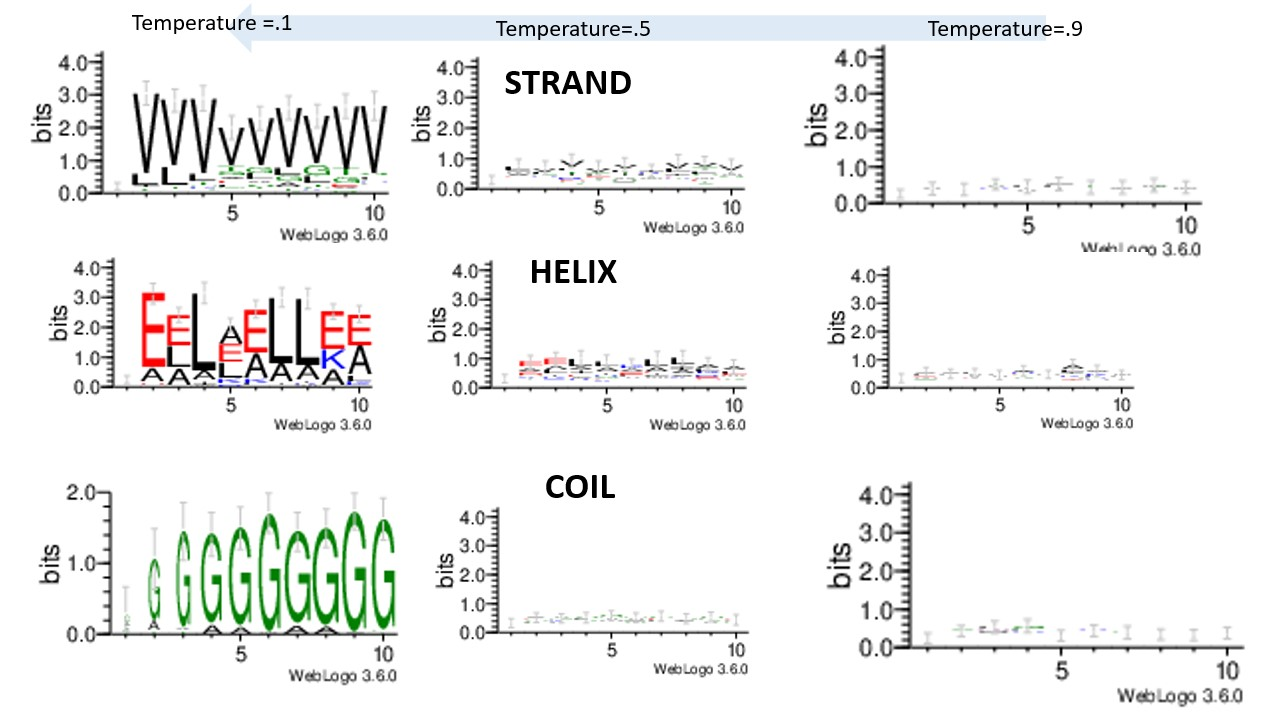

In [6]:
Image(filename='./temperature_test.jpg')

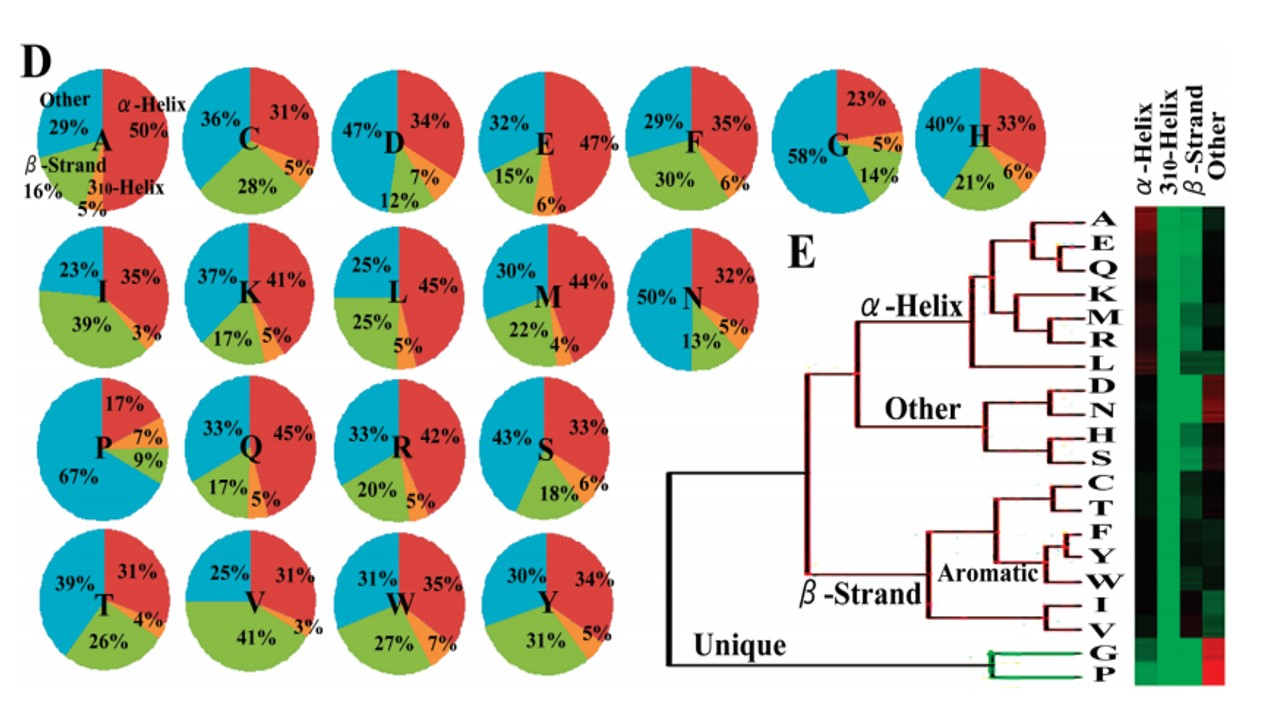

In [7]:
Image(filename='./freq_aa_ss.jpg')

In [11]:
%run helping-20180623.ipynb

In [12]:
rnn = torch.load('./pretrain_model_20180610.pt', map_location='cpu')

AttributeError: Can't get attribute 'RNN' on <module '__main__'>

In [ ]:
# xPxxPxxRQ